# **Momentum-Based Trading Strategy**
*   This strategy generates trading signals based on historical price trends
*   It utilizes a moving average crossover to identify potential buy and sell points
*   The strategy involves taking either long or short positions in the market
*   Keep in mind that real-world trading results may vary from this model

**Libraries**

In [68]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

# **Downloading Data**


*   Uses Yahoo Finance's Gold ETF historical data from 2004 - 2024



In [69]:
gld = yf.download("GLD")
day = np.arange(1, len(gld)+1)
gld.insert(0,'day',day)
gld.drop(columns=['Adj Close', 'Volume'], inplace=True)
gld.head()

[*********************100%%**********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2004-11-18,1,44.430000,44.490002,44.070000,44.380001
2004-11-19,2,44.490002,44.919998,44.470001,44.779999
2004-11-22,3,44.750000,44.970001,44.740002,44.950001
2004-11-23,4,44.880001,44.919998,44.720001,44.750000
2004-11-24,5,44.930000,45.049999,44.790001,45.049999


# **Add Moving Averages to the data frame**

Prepares the data for a trend-following trading strategy by creating two moving averages with different time horizons.
These averages can then be used to generate signals based on their crossovers, indicating potential shifts in the price trend.

*   Calculates a 9-day moving average and a 21-day moving average from the closing prices
*   Shifts these moving averages one day back to avoid look-ahead bias.
*   Displays a subset of the DataFrame (rows 19 to 24) to show the calculated values

In [70]:
gld['9-day']= gld['Close'].rolling(window=9).mean().shift(1)
gld['21-day']= gld['Close'].rolling(window=21).mean().shift(1)
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2004-12-16,20,43.990002,44.049999,43.580002,43.680000,44.284444,NaN
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,44.071111,NaN
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428


# **Trading Signal Generation**
* The code creates trading signals based on the comparison of two moving averages.
*   It handles missing data by removing incomplete data points
*   It displays the beginning of the adjusted data for review

In [71]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1,0)
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,0
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,0
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,0


# **Calculating Returns and Entry Points**
*   Computes daily logarithmic returns of the asset's closing price
*   Calculates the returns of the trading system by multiplying the signals with the daily returns
*   Identifies potential entry and exit points by detecting changes in the trading signals
*   Displays the first few rows of the DataFrame to showcase the calculated values



In [72]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,0,NaN,NaN,NaN
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,0,-0.002710,-0.0,0.0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,0,-0.004533,-0.0,0.0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,0,0.005663,0.0,0.0
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,0,0.004732,0.0,0.0


# **Visualizing Trading Signals**
*   The code plots the 9-day and 21-day moving averages
*   Green upward triangles indicate potential buy (long) entry points
*   Red downward triangles and blue crosses mark potential sell (short or close long) points
*   The plot provides a clear visual representation of the trading signals in relation to price

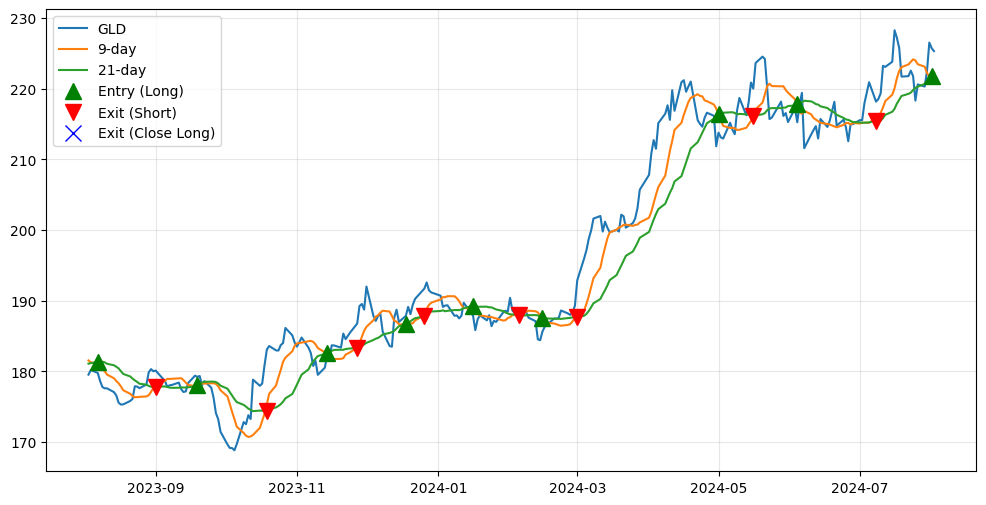

In [73]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=0.3)
plt.plot(gld.iloc[-252:]['Close'], label='GLD')
plt.plot(gld.iloc[-252:]['9-day'], label='9-day')
plt.plot(gld.iloc[-252:]['21-day'], label='21-day')

# Entry signals (buy)
plt.plot(gld.iloc[-252:].loc[gld.entry == 1].index,
         gld.iloc[-252:]['21-day'][gld.entry == 1],
         '^', color='g', markersize=12, label='Entry (Long)')

# Exit signals (sell)
plt.plot(gld.iloc[-252:].loc[gld.entry == -1].index,
         gld.iloc[-252:]['21-day'][gld.entry == -1],
         'v', color='r', markersize=12, label='Exit (Short)')

# Exit signals (close long position)
plt.plot(gld.iloc[-252:].loc[gld.entry == -2].index,
         gld.iloc[-252:]['21-day'][gld.entry == -2],
         'x', color='b', markersize=12, label='Exit (Close Long)')

plt.legend(loc=2)
plt.show()

#**Comparing Cumulative Returns**
*   Plot the cumulative returns of a buy-and-hold strategy and the trading strategy for both approaches


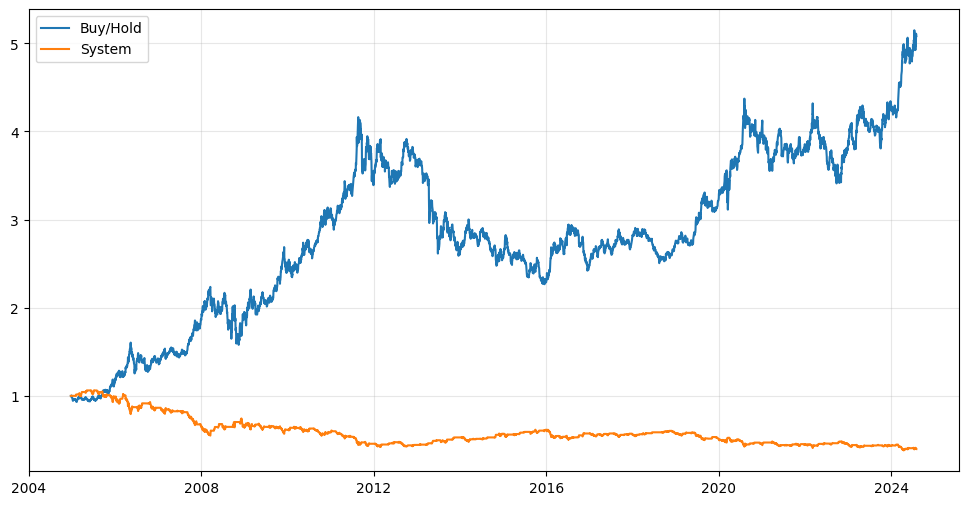

In [74]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.grid(True, alpha=0.3)
plt.legend() # Add this line to display the labels
plt.show()

#**Total Returns over the 2004-2024 period**


In [81]:
return_result = np.exp(gld['return']).cumprod() - 1
result_last_row = result.iloc[-1]
print("Buy/Hold Return: {:.2%}".format(result_last_row))

return_result1 = np.exp(gld['system_return']).cumprod() - 1
result_last_row_1 = return_result1.iloc[-1]
print("Strategy Return: {:.2%}".format(result_last_row_1))

Buy/Hold Return: 408.21%
Strategy Return: -60.44%


         Day  Price  3-Day MA  3-Day MA (Shifted)
0     Monday    1.0       NaN                 NaN
1    Tuesday    1.1       NaN                 NaN
2  Wednesday    1.2       1.1                 NaN
3   Thursday    1.3       1.2                 1.1
4     Friday    1.4       1.3                 1.2


In [ ]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4959 entries, 2004-11-18 to 2024-08-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4959 non-null   float64
 1   High    4959 non-null   float64
 2   Low     4959 non-null   float64
 3   Close   4959 non-null   float64
dtypes: float64(4)
memory usage: 193.7 KB
